# **Bosques Aleatorios**

Método de ensamble basado en árboles de decisión entrenados aleatoriamente con el objetivo de disminuir la varianza y evitar sobre-entrenamiento.

## Ventajas:

*   Método robusto
*   Evita sobre-entrenamiento
*   Disminuye la varianza en la predicción respecto a los árboles de decisión
*   Prioriza las características más importantes

## Desventajas:

*   Pueden ser lentos con grandes cantidades de datos
*   La interpretación del modelo no transparente

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# 1. Dataset Titanic

In [2]:
# Cargamos el dataset
df= pd.read_csv("Titanic.csv")
# Descripción genereal del conjunto de datos
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,448.483826,0.403657,2.241913,29.621899,0.514768,0.431786,34.534323
std,258.849806,0.490976,0.836147,14.493108,0.931147,0.854517,52.968619
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,444.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.550000
75%,677.500000,1.000000,3.000000,38.000000,1.000000,1.000000,32.750000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Cambiamos la variable categórica Sex por la variable numérica Sex_male (Donde male = 1, fremale = 0)
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True


In [5]:
# Seleccionamos las características para el modelo
data = df[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp','Survived']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp,Survived
0,True,7.2500,22.0,3,1,0
1,False,71.2833,38.0,1,1,1
2,False,7.9250,26.0,3,0,1
3,False,53.1000,35.0,1,1,1
4,True,8.0500,35.0,3,0,0


In [6]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  711 non-null    bool   
 1   Fare      711 non-null    float64
 2   Age       711 non-null    float64
 3   Pclass    711 non-null    int64  
 4   SibSp     711 non-null    int64  
 5   Survived  711 non-null    int64  
dtypes: bool(1), float64(2), int64(3)
memory usage: 28.6 KB


In [7]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# X son nuestras variables independientes
X = data.drop(["Survived"],axis = 1)

# y es nuestra variable dependiente
y = data.Survived

# División 75% de datos para entrenamiento, 25% de daatos para test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [8]:
# Creaamos el modelo de Bosques Aleatorios (y configuramos el número de estimadores (árboles de decisión))
BA_model = RandomForestClassifier(n_estimators = 19, 
                                  random_state = 2016,
                                  min_samples_leaf = 8,)

## Entrenamiento

In [9]:
BA_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=8, n_estimators=19, random_state=2016)

## Accuracy promedio (Usando datos de Test)

In [10]:
# Accuracy promedio
BA_model.score(X_test, y_test)

0.848314606741573

## Matriz de Confusión

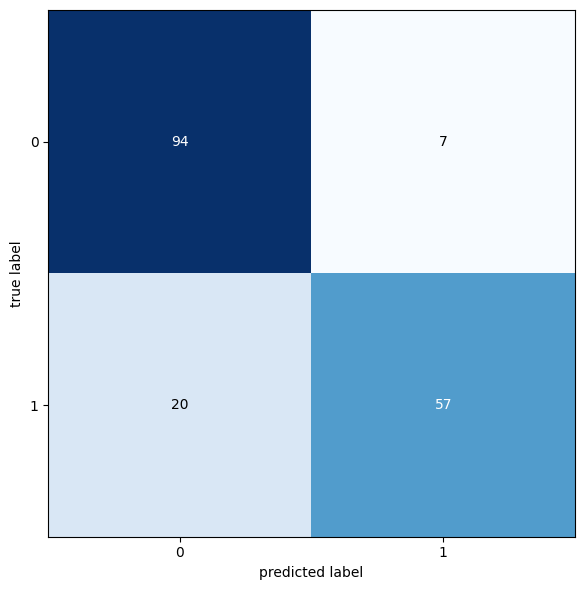

In [12]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Predicción del modelo usando los datos de prueba
y_pred = BA_model.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()